# Notebook to analyze UV-vis data

In [4]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [6]:
# Import data
data = pd.read_excel('./UV_Vis/Paninis_Feb_2019.xlsx', sheet_name='Sheet2')
columns = data.columns
data["Energy"] = (4.135667516E-15)*(299792458)/(data[columns[0]]*1E-9)
columns = data.columns
data.head()

,Wavelength nm.,Paninis_Feb_2019_145950,Paninis_Feb_2019_150424,Paninis_Feb_2019_150812,Paninis_Feb_2019_151139,Paninis_Feb_2019_151533,Paninis_Feb_2019_151850,Energy
0,300.0,11.373,3.997,29.529,6.010,24.310,8.719,4.132806
1,300.5,7.545,3.727,26.727,6.231,22.177,8.701,4.125930
2,301.0,6.815,3.179,23.524,6.523,18.162,7.568,4.119076
3,301.5,6.657,2.727,19.895,6.039,14.540,6.390,4.112245
4,302.0,4.371,2.677,16.230,4.355,12.110,6.037,4.105437


In [14]:
list(columns)[1:7]
sub_columns = list(columns)[1:7]

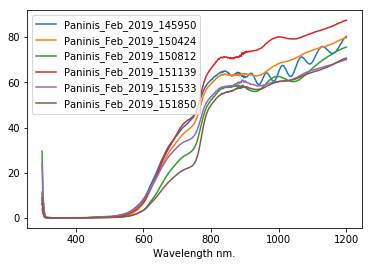

In [16]:
data.plot(x=columns[0], y=sub_columns)

In [17]:
for column in sub_columns:
    name = 'A_' + column
    data[name] = 100 - data[column]
columns = data.columns

In [37]:
list(columns)[8:14]
a_columns = list(columns)[(len(sub_columns)+2):(len(sub_columns)*2+2)]
a_columns

['A_Paninis_Feb_2019_145950',
 'A_Paninis_Feb_2019_150424',
 'A_Paninis_Feb_2019_150812',
 'A_Paninis_Feb_2019_151139',
 'A_Paninis_Feb_2019_151533',
 'A_Paninis_Feb_2019_151850']

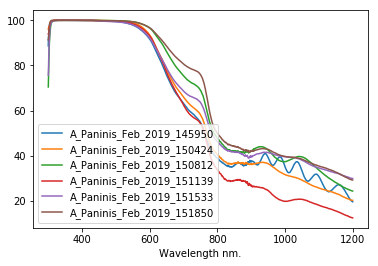

In [40]:
data.plot(x=columns[0], y=a_columns)

In [44]:
for column in sub_columns:    
    absorbance = 100 - data[column]
    alpha = -(1/0.00000050)*np.log(data[column]/100)
    name = column + '_Tauc_direct'
    data[name] = np.power(data['Energy'], 2) * np.power(alpha, 2)
    
columns = data.columns

In [47]:
t_columns = list(columns)[(len(sub_columns)*2+2):(len(sub_columns)*3+2)]

['Paninis_Feb_2019_145950_Tauc_direct',
 'Paninis_Feb_2019_150424_Tauc_direct',
 'Paninis_Feb_2019_150812_Tauc_direct',
 'Paninis_Feb_2019_151139_Tauc_direct',
 'Paninis_Feb_2019_151533_Tauc_direct',
 'Paninis_Feb_2019_151850_Tauc_direct']

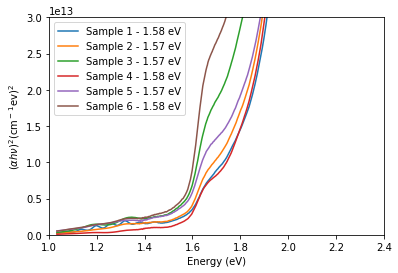

In [162]:
data.plot(x='Energy', y=t_columns)
#data.plot(x='Energy', y=[columns[14], columns[15],
 #                       columns[16], columns[17]])
plt.xlim(1, 2.4)
plt.ylim(0, 0.03E15)
plt.xlabel('Energy (eV)')
plt.ylabel(r'($\alpha h \nu$)$^2$(cm$^-$$^1$ev)$^2$')
plt.legend(['Sample 1 - 1.58 eV', 'Sample 2 - 1.57 eV', 'Sample 3 - 1.57 eV', 
            'Sample 4 - 1.58 eV', 'Sample 5 - 1.57 eV', 'Sample 6 - 1.58 eV'])
plt.savefig('tauc_plots_paninis.png', dpi=300)

1.58
1.57
1.57
1.58
1.57
1.58


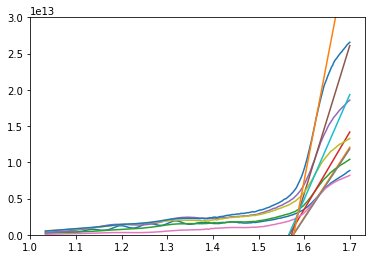

In [163]:
sub_data = data[data.Energy < 1.7]

for column in t_columns:
    x = np.array(sub_data.Energy)
    y = np.array(sub_data[column])
    plt.plot(x, (y))
    y_1 = np.diff(y)/np.diff(x)
    #plt.plot(x[:-1], normalize(y_1))
    #plt.axvline(x[np.argmax(y_1)])
    slope = max(np.diff(y)/np.diff(x))
    b = y[np.argmax(y_1)] - slope*x[np.argmax(y_1)]
    band_gap = -b/slope
    plt.plot(x, slope*x+b)
    plt.ylim(0, 0.3e14)
    print(np.round(band_gap, 2))

In [151]:
def normalize(x):
    return (x-max(x))/(max(x)-min(x))